### Script to calculate distances between atoms with pytraj

Made by XFF


In [21]:
#Calculate distances between the desired residues, atoms, etc
%matplotlib inline
import pytraj as pt
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time


In [ ]:

w_dir = '/media/xavi/99e463f2-6cec-40d5-85bb-b6aa84b4b648/gh3'
save_dir = '/media/xavi/99e463f2-6cec-40d5-85bb-b6aa84b4b648/HRMOVA_PAPER/'

target = 'WA'
prod = '3'

prod3 = ' G3OG3OG'
prod6 = ' G3OG3OG3OG3OG3OG'
gamd = ' GaMD'
md = ' MD'


tag = str(target) + prod3 + md
dcd_path = 'w434a_mdcrd/dcd/w434a-nowat-fix-v2.dcd'
prmtop_path = 'w434a_mdcrd/dcd/w434a-nowat.prmtop'


In [23]:
TRAJECTORY_FILENAME = os.path.join(w_dir, dcd_path )
TOPOLOGY_FILENAME = os.path.join(w_dir, prmtop_path)
TRAJECTORY_LENGTH = 1000 #Length of the trajectory in ns (for correct axis labels in plots)
print(TRAJECTORY_FILENAME)

/media/xavi/99e463f2-6cec-40d5-85bb-b6aa84b4b648/gh3/w434a_mdcrd/dcd/w434a-nowat-fix-v2.dcd


In [24]:
trajectory = pt.iterload(TRAJECTORY_FILENAME, TOPOLOGY_FILENAME)
trajectory = trajectory[:]
trajectory = pt.align(trajectory)
print(trajectory)

pytraj.Trajectory, 5000 frames: 
Size: 1.027398 (GB)
<Topology: 9193 atoms, 610 residues, 5 mols, PBC with box type = ortho>
           


In [28]:
if target == 'WT' and prod == '6':
    head_trp = '@9292 @4437'
    tail_trp = '@9208 @4437'

if target == 'WH' and prod == '6':
    head_trp = '@9241 @4393'
    tail_trp = '@9157 @4393 '

if target == 'WA' and prod == '6':

    head_trp = '@9233 @4393'
    tail_trp = '@9149 @4393'
    
if target == 'WT' and prod == '3':
    head_trp = '@9204 @4437'
    tail_trp = '@9183 @4437'

if target == 'WH' and prod == '3':
    head_trp = '@9153 @4393'
    tail_trp = '@9132 @4393 '

if target == 'WA' and prod == '3':

    head_trp = '@9146 @4393'
    tail_trp = '@9125 @4393'

In [29]:
dist = pt.distance(trajectory, mask=head_trp)
dist2 = pt.distance(trajectory, mask=tail_trp)


In [30]:
output_graph = (str(target)+'_'+str(tag)+'.pdf') #Output filename for the plot
print(output_graph)

#DIST_COLOR = 'forestgreen' #Color of the line
#MAX_DIST = math.ceil(dist.max()) #It can be modified if you want to change the scale of the plot

WA_WA G3OG3OG MD.pdf


/media/xavi/99e463f2-6cec-40d5-85bb-b6aa84b4b648/HRMOVA_PAPER/WA_WA G3OG3OG MD.pdf


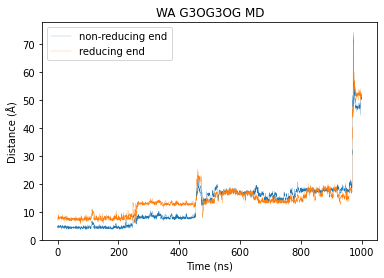

In [31]:
plt.figure()
plt.plot([TRAJECTORY_LENGTH*a/len(dist) for a in range(len(dist))], dist, linewidth=0.2, label='non-reducing end')#, color=DIST_COLOR)
plt.plot([TRAJECTORY_LENGTH*a/len(dist2) for a in range(len(dist2))], dist2, linewidth=0.2, label='reducing end')
#plt.ylim(0, MAX_DIST)
plt.xlabel('Time (ns)')
plt.ylabel('Distance (Å)')
plt.title(str(tag))
plt.legend()
plt.savefig(str(save_dir+output_graph), bbox_inches='tight')

print(save_dir+output_graph)